# Lecture 3. Phases vs. Magnitude Demo

## Setup Notebook Environments
We first want to load necessary extensions and modules that we will use throughout this demo

In [1]:
# load extensions
%load_ext autoreload
%autoreload 2

In [2]:
# load packages
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from utils.display import merge_and_display_mag_phase, display_mag_phase_images
from utils.image_processing import get_mag_phase_images
from utils.io import read_image
from os import path
import cv2

In [3]:
# enable interactive matplotlib
%matplotlib inline

## Load in data to use
Next, we will load in data in grayscale floating point image format.

In [4]:
# load in images
image_path = './data'
# list all image names
im_beach_filename   = 'im_beach.JPG'
im_monaco_filename  = 'im_monaco.png'
im_outdoor_filename = 'im_outdoor.png'
im_town_filename    = 'im_town.png'

# setup full path
im_beach_file   = path.join(image_path, im_beach_filename)
im_monaco_file  = path.join(image_path, im_monaco_filename)
im_outdoor_file = path.join(image_path, im_outdoor_filename)
im_town_file    = path.join(image_path, im_town_filename)

# read files in grayscale, and convert to float
im_beach     = read_image(im_beach_file)
im_monaco    = read_image(im_monaco_file)
im_outdoor   = read_image(im_outdoor_file)
im_town      = read_image(im_town_file)

## Compute FFT Magnitude and Phases

We will run FFT to obtain real and imaginary frequencies. We then compute magnitude and phase of transformed values.

In [5]:

images = get_mag_phase_images(im_outdoor, im_monaco)
im1, im1_mag, im1_phase, im2, im2_mag, im2_phase = images

Now that we have magnitude and phases, let's display them.

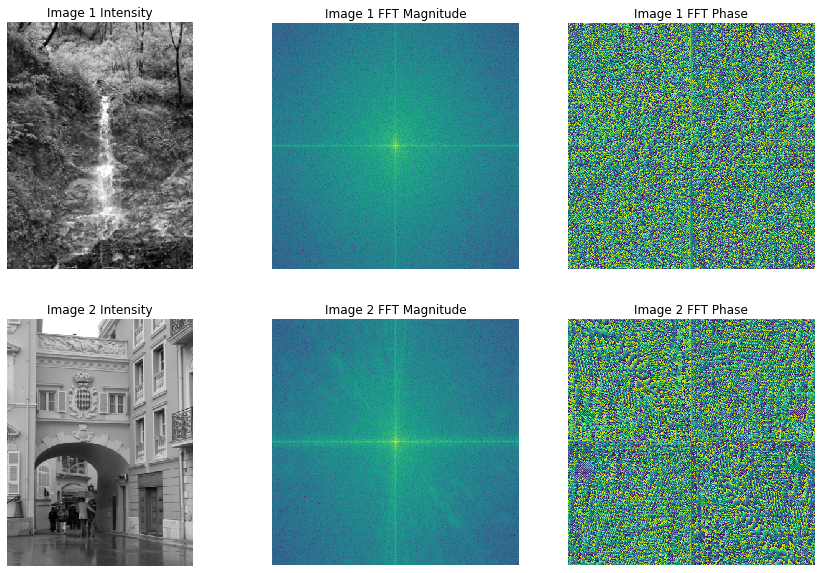

In [6]:
display_mag_phase_images(*images)

## Merge Magnitude and Phase of different images

Before we merge magnitude and phases, let's think about how the signals will look like.

We will first merge magnitude of image 1, and phase of image 2.

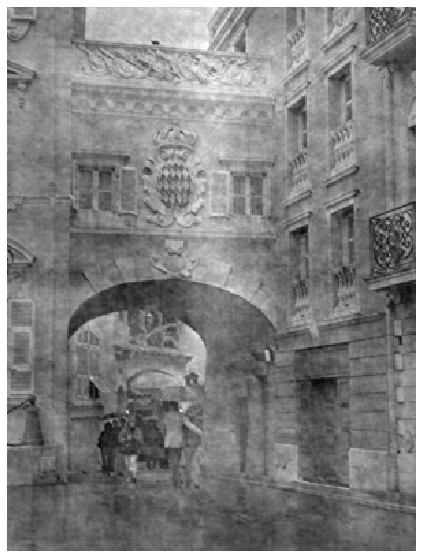

In [7]:
im1_mag_im2_phase = merge_and_display_mag_phase(im2, im1_mag, im2_phase)

Now, let's merge magnitude of image 2, and phase of image 1

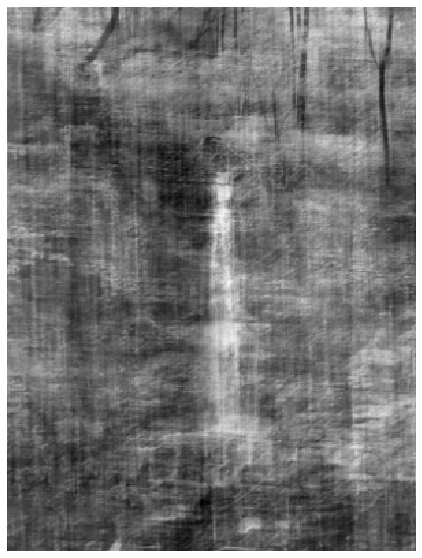

In [8]:
im2_mag_im1_phase = merge_and_display_mag_phase(im2, im2_mag, im1_phase)

Let's try to visualize it once more, since it is cool

Text(0.5, 1.0, 'Image 1 Mag + Image 2 Phase')

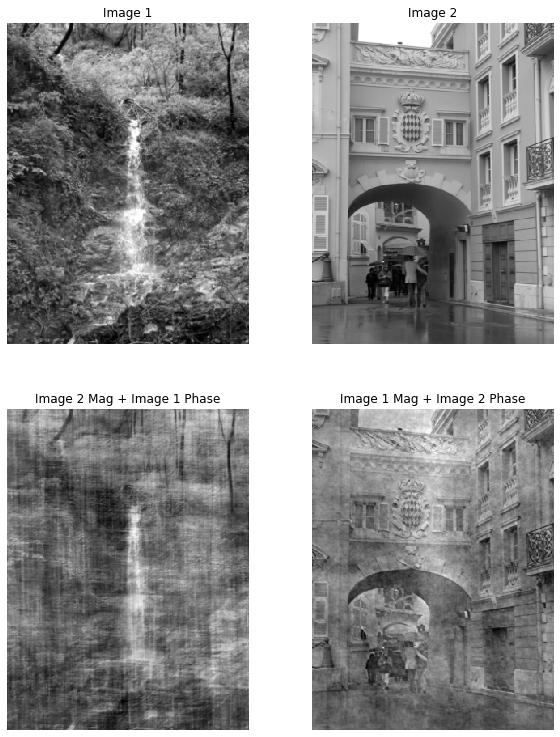

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 13))
[a.axis('off') for a in axes.ravel()]
axes[0, 0].imshow(images[0], cmap='gray')
axes[0, 1].imshow(images[3], cmap='gray')
axes[1, 0].imshow(im2_mag_im1_phase, cmap='gray')
axes[1, 1].imshow(im1_mag_im2_phase, cmap='gray')
axes[0, 0].set_title('Image 1')
axes[0, 1].set_title('Image 2')
axes[1, 0].set_title('Image 2 Mag + Image 1 Phase')
axes[1, 1].set_title('Image 1 Mag + Image 2 Phase')
